<img src="classical_gates.png" />

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer

from qiskit.tools.jupyter import *
from qiskit.visualization import *

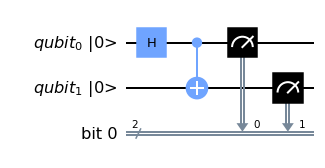

In [2]:
qr = QuantumRegister(2, 'qubit')
cr = ClassicalRegister(2, name="bit")
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw('mpl', initial_state=True)

{'00': 495, '11': 505}


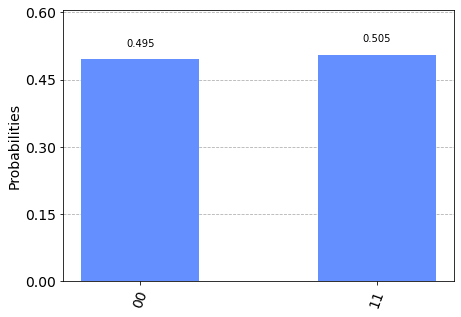

In [3]:
# Load simulator
local_simulator = BasicAer.get_backend('qasm_simulator')

job = execute(circuit, backend=local_simulator, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

# Deutsch Algorithm

<table>
<tbody>
<tr>
<td colspan="2"><img src="deutsch_problem.png" /></td>
</tr>
<tr>
<td><img src="classic_oracle.png" /></td>
<td><img src="quantum_oracle.png" /></td>
</tr>
</tbody>
</table>

## Oracle 4: Constant zero

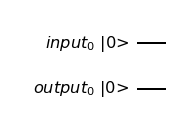

In [4]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
constant0 = QuantumCircuit(input, output, name='oracle')
oracle4 = constant0.to_instruction()
constant0.draw('mpl', initial_state=True)

## Oracle 3: Constant one

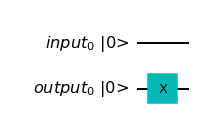

In [5]:
input = QuantumRegister(1, name='input')
temp = QuantumRegister(1, name='output')
constant1 = QuantumCircuit(input, temp, name='oracle')
constant1.x(temp)
oracle3 = constant1.to_instruction()
constant1.draw('mpl', initial_state=True)

## Oracle 1: Identity

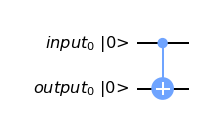

In [6]:
input = QuantumRegister(1, name='input')
temp = QuantumRegister(1, name='output')
identity = QuantumCircuit(input, temp, name='oracle')
identity.cx(input, temp)
oracle1 = identity.to_instruction()
identity.draw('mpl', initial_state=True)

## Oracle 2: Invert

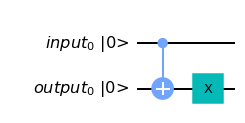

In [7]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
invert = QuantumCircuit(input, output, name='oracle')
invert.cx(input, output)
invert.x(output)
oracle2 = identity.to_instruction()
invert.draw('mpl', initial_state=True)

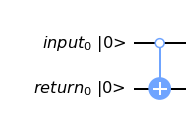

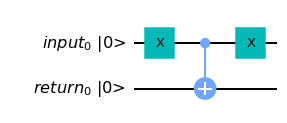

In [8]:
# footnote on alternative ways to write classical functions as quantum circuits

from qiskit.circuit import classical_function
from qiskit.circuit import Int1

@classical_function
def alt_invert(input: Int1) -> Int1:
    return not input

invert_gate = alt_invert.synth(registerless=False)
display(invert_gate.draw('mpl', initial_state=True))
invert_gate.decompose().draw('mpl', initial_state=True)

## Run an oracle

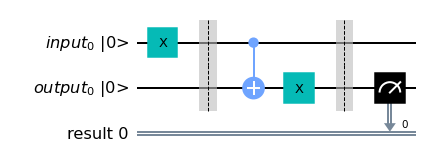

In [9]:
result = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(input, output, result)
circuit.x(input) # <- set input to 1
circuit.barrier()
circuit += invert # options: identity, invert, constant1, constant0
circuit.barrier()
circuit.measure(output, result)
circuit.draw('mpl', initial_state=True)

In [10]:
job = execute(circuit, backend=local_simulator, shots=1000)
print(job.result().get_counts())

{'0': 1000}


## Running Deutsch's Algorithm

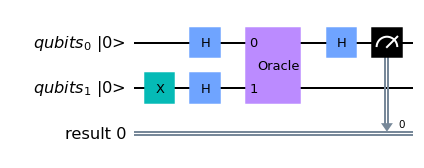

In [11]:
qr = QuantumRegister(2, name='qubits')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.append(oracle2, [qr[0], qr[1]])  # <--- oracle!
circuit.h(qr[0])
circuit.measure(qr[0], cr[0]);
circuit.draw('mpl', initial_state=True, justify='right')

In [12]:
counts = execute(circuit, backend=local_simulator, shots=1).result().get_counts()
#                                                        ^
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)
print(counts)

{'BALANCED': 1, 'CONSTANT': None}


# Real device!

In [13]:
import qiskit.tools.jupyter
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [14]:
provider = IBMQ.load_account()
least_busy_device = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 2))
least_busy_device

/Users/bel/repos/qiskit-terra/venv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
job = execute(circuit, backend=least_busy_device, shots=1000)

In [16]:
print(job.status())

JobStatus.QUEUED


In [17]:
job.wait_for_final_state()
print(job.status())

JobStatus.DONE


In [18]:
counts = job.result().get_counts()

In [19]:
counts = job.result().get_counts()
print(counts)
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)
print(counts)

{'0': 41, '1': 959}
{'BALANCED': 959, 'CONSTANT': 41}
